# The randomForestClassifier 

In [59]:
#Importing the needed library 
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [60]:
#Importing my data from earlier bank first


X_bank_train = pd.read_csv("splitData/bank/X_bank_train.csv",index_col=0)
X_bank_test = pd.read_csv("SplitData/bank/X_bank_test.csv",index_col=0)

y_bank_train = pd.read_csv("splitData/bank/Y_bank_train.csv",index_col=0)
y_bank_test = pd.read_csv("splitData/bank/Y_bank_test.csv",index_col=0)


del X_bank_train["CustomerId"]
del X_bank_train["Unnamed: 0.1"]


del X_bank_test["CustomerId"]
del X_bank_test["Unnamed: 0.1"]



In [61]:
X_bank_train = pd.get_dummies(X_bank_train, prefix=['Geography','Gender'])

X_bank_test = pd.get_dummies(X_bank_test, prefix=['Geography','Gender'])

In [62]:
#Importing my data from earlier telco first and cleaning it up


X_telco_train = pd.read_csv("splitData/telco/X_telco_train.csv",index_col=0)
X_telco_test = pd.read_csv("SplitData/telco/X_telco_test.csv",index_col=0)

y_telco_train = pd.read_csv("splitData/telco/Y_telco_train.csv",index_col=0)
y_telco_test = pd.read_csv("splitData/telco/Y_telco_test.csv",index_col=0)


del X_telco_train["CustomerID"]
del X_telco_test["CustomerID"]

del X_telco_train["City"]
del X_telco_test["City"]


del X_telco_train["Unnamed: 0.1"]
del X_telco_test["Unnamed: 0.1"]

X_telco_train["Total Charges"] = X_telco_train["Total Charges"].astype(str).replace('\.\d\d', '', regex=True)
X_telco_train["Total Charges"] = X_telco_train["Total Charges"].astype(str).replace('\.\d', '', regex=True)
X_telco_train["Total Charges"] = X_telco_train["Total Charges"].replace(" ", 0)
X_telco_train["Total Charges"] = X_telco_train["Total Charges"].astype(int)

X_telco_test["Total Charges"] = X_telco_test["Total Charges"].astype(str).replace('\.\d\d', '', regex=True)
X_telco_test["Total Charges"] = X_telco_test["Total Charges"].astype(str).replace('\.\d', '', regex=True)
X_telco_test["Total Charges"] = X_telco_test["Total Charges"].replace(" ", 0)
X_telco_test["Total Charges"] = X_telco_test["Total Charges"].astype(int)





display(X_telco_test.dtypes)

Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen          bool
Partner                 bool
Dependents              bool
Tenure Months          int64
Phone Service           bool
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing       bool
Payment Method        object
Monthly Charges      float64
Total Charges          int32
dtype: object

In [63]:
X_telco_train = pd.get_dummies(X_telco_train, prefix=['Gender',"Multiple Lines","Internet Service","Online Security",
                                             "Online Backup","Device Protection","Tech Support","Streaming TV",
                                              "Streaming Movies","Contract","Payment Method"],
                               drop_first = True)

display(X_telco_train.dtypes)

Zip Code                                    int64
Latitude                                  float64
Longitude                                 float64
Senior Citizen                               bool
Partner                                      bool
Dependents                                   bool
Tenure Months                               int64
Phone Service                                bool
Paperless Billing                            bool
Monthly Charges                           float64
Total Charges                               int32
Gender_Male                                 uint8
Multiple Lines_No phone service             uint8
Multiple Lines_True                         uint8
Internet Service_False                      uint8
Internet Service_Fiber optic                uint8
Online Security_No internet service         uint8
Online Security_True                        uint8
Online Backup_No internet service           uint8
Online Backup_True                          uint8


In [64]:
X_telco_test = pd.get_dummies(X_telco_test, prefix=['Gender',"Multiple Lines","Internet Service","Online Security",
                                             "Online Backup","Device Protection","Tech Support","Streaming TV",
                                              "Streaming Movies","Contract","Payment Method"],
                             drop_first = True)

X_telco_test.dtypes

Zip Code                                    int64
Latitude                                  float64
Longitude                                 float64
Senior Citizen                               bool
Partner                                      bool
Dependents                                   bool
Tenure Months                               int64
Phone Service                                bool
Paperless Billing                            bool
Monthly Charges                           float64
Total Charges                               int32
Gender_Male                                 uint8
Multiple Lines_No phone service             uint8
Multiple Lines_True                         uint8
Internet Service_False                      uint8
Internet Service_Fiber optic                uint8
Online Security_No internet service         uint8
Online Security_True                        uint8
Online Backup_No internet service           uint8
Online Backup_True                          uint8


In [65]:
print(np.shape(X_telco_test))

(748, 33)


# Bank forest

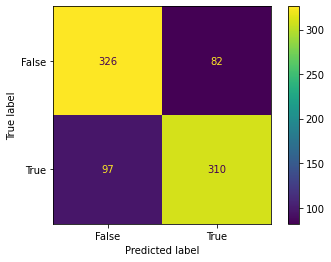

In [66]:
from sklearn.ensemble import RandomForestClassifier

bankForest = RandomForestClassifier( random_state=42,min_samples_leaf=2,
                                      class_weight = "balanced",n_estimators = 100,ccp_alpha = 0.0005)



bankForest.fit(X_bank_train, y_bank_train["Exited"])


bankResults = list(bankForest.predict(X_bank_test))

plot_confusion_matrix(bankForest, X_bank_test, y_bank_test)  
plt.show()

In [67]:
print(len(X_bank_train))
print(len(X_bank_test))
print(precision_score(y_bank_test, bankResults, average =  "macro"))
print(recall_score(y_bank_test, bankResults ,  pos_label=1))
print(f1_score(y_bank_test, bankResults ,  pos_label=1))
print(roc_auc_score(y_bank_test, bankResults))

3259
815
0.7807509528634149
0.7616707616707616
0.7759699624530663
0.7803451847569496


# Telco Forest

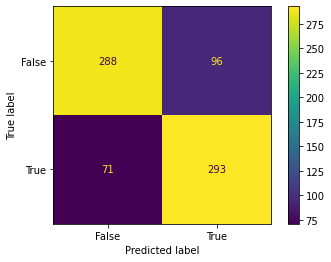

In [68]:


telcoForest = RandomForestClassifier(random_state=42,min_samples_leaf=2,
                                      class_weight = "balanced",n_estimators = 100,ccp_alpha = 0.0005)



telcoForest.fit(X_telco_train, y_telco_train["Churn Value"])


telcoResults = list(telcoForest.predict(X_telco_test))

plot_confusion_matrix(telcoForest, X_telco_test, y_telco_test)  
plt.show()

In [69]:
print(len(X_telco_train))
print(len(X_telco_test))
print(precision_score(y_telco_test, telcoResults,  pos_label=1))
print(recall_score(y_telco_test, telcoResults,  pos_label=1))
print(f1_score(y_telco_test, telcoResults,  pos_label=1))
print(roc_auc_score(y_telco_test, telcoResults))

2990
748
0.7532133676092545
0.804945054945055
0.7782204515272244
0.7774725274725275


In [70]:
telcoForest.get_params(deep = False)

{'bootstrap': True,
 'ccp_alpha': 0.0005,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [71]:
bankForest.get_params(deep = False)

{'bootstrap': True,
 'ccp_alpha': 0.0005,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [72]:

importances = list(zip(telcoForest.feature_importances_, X_telco_train.columns))
importances.sort(reverse=True)
print(importances)

[(0.16437036350016732, 'Tenure Months'), (0.11831755209925139, 'Total Charges'), (0.08471540385066077, 'Monthly Charges'), (0.060727669515579105, 'Internet Service_Fiber optic'), (0.06066407593575906, 'Longitude'), (0.059330632830213455, 'Latitude'), (0.05850908302951983, 'Zip Code'), (0.05242110406301663, 'Contract_Two year'), (0.04176337648859389, 'Dependents'), (0.0400163051117134, 'Payment Method_Electronic check'), (0.02777213999039917, 'Contract_One year'), (0.017886699336846123, 'Tech Support_True'), (0.017557287768285003, 'Online Security_True'), (0.01492810458857558, 'Paperless Billing'), (0.013535708859338807, 'Online Backup_No internet service'), (0.013435059787988472, 'Streaming Movies_No internet service'), (0.01200500274905582, 'Device Protection_No internet service'), (0.011740042708747811, 'Internet Service_False'), (0.01169698811873648, 'Online Backup_True'), (0.011569208829601442, 'Gender_Male'), (0.01137885912436563, 'Tech Support_No internet service'), (0.0112058254

In [73]:
importances = list(zip(bankForest.feature_importances_, X_bank_train.columns))
importances.sort(reverse=True)
print(importances)

[(0.2952732621550022, 'Age'), (0.15893629644066673, 'NumOfProducts'), (0.13327774577703072, 'Balance'), (0.10443437788279228, 'EstimatedSalary'), (0.10051074951017441, 'CreditScore'), (0.06250078074263656, 'Tenure'), (0.04503655669081566, 'IsActiveMember'), (0.033756399998808743, 'Geography_Germany'), (0.01632627459326525, 'Gender_Male'), (0.015043173197334095, 'Gender_Female'), (0.012821908839147463, 'HasCrCard'), (0.011759639559175299, 'Geography_France'), (0.010322834613150693, 'Geography_Spain')]
